### Miner and Blockchain Testing

In [1]:
# Import required packages for this notebook
%matplotlib inline
import hashlib
import numpy
import matplotlib.pyplot as plt
import time

from Crypto.PublicKey import RSA
from Crypto import Random

In [2]:
# Test text hashing
hash_object = hashlib.sha256(b"123")
hex_dig = hash_object.hexdigest()
print(hex_dig)

a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3


In [3]:
# Object for Person's Digital Wallet
# ** Modified to include PoW method

class DigitalWallet(object):
    def __init__(self, name):
                
        # Owner of the wallet
        self._name = name
        
        # Generate RSA keys on object creation
        private_key, public_key = self.__generate_RSA_keys(2048)
        
        # Objects RSA keys
        self._private_key = private_key # This should never be sent out
        self._public_keys = {self._name: public_key} 
        
    def __generate_RSA_keys(self, num_bits):
        # Keys that are generated when the digital wallet is created
        random_generator = Random.new().read
        private_key = RSA.generate(2048, random_generator)
        public_key = private_key.publickey()
        return private_key, public_key
    
    def send_public_keys(self):
        # Public key can be sent to others for message encryption
        return {self._name: self._public_keys[self._name].exportKey(format='PEM')}
    
    def receive_public_key(self, key_dict):
        # Recieve a public key from another person
        for key, val in key_dict.items():
            public_key = RSA.importKey(val)
            self._public_keys[key] = public_key
        
    def send_encrypted_message(self, to_user, message):
        # Encrypt with the public key and return to user
        return self._public_keys[to_user].encrypt(message, K=None)

    def proof_of_work(self, encrypted_message):
        init_time = time.time()
        hash_message = hashlib.sha256(message).hexdigest()
        first_byte = hash_message[:3]
        counter = -1
        while first_byte != "000":
            counter +=1 
            #had to convert encrypted msg from tuple to byte to be hashed
            hash_message = hashlib.sha256(b"".join(encrypted_message) + bytes(str(counter), encoding="UTF-8")).hexdigest()
            first_byte = hash_message[:3]
        final_time = time.time()
        print("Time to proof = ", final_time - init_time)
        return bytes(str(counter), encoding="UTF-8")
    
    def receive_encrypted_message(self, encrypted_message, nonce):
        #checking if miner did his job 
        hash_message = hashlib.sha256(b"".join(encrypted_message) + nonce).hexdigest()
        if(hash_message[:3] == "000"):
            decoded_message = self._private_key.decrypt(encrypted_message)
            print(decoded_message)
        else:
            print("Miner has not proof of worked this message")

## Preliminary Proof of Work checks

In [4]:
# Function for testing the Proof of Work function
def proof_of_work_test(dif, message):
    start_time = time.time() # Start timer
    counter = 0 # the nonce = counter
    target_bytes = dif * str(0) # Brute force target

    #Brute forcing proof of work till the first X chars in hashed msg are 0
    while True:
        #Concatenating byte and str(int) and sha256 hashing the result
        hash_message = hashlib.sha256(message + bytes(str(counter), 
                                                      encoding="UTF-8")).hexdigest()
        check_bytes = hash_message[:dif]
        
        # Check to see a result has been found
        if check_bytes == target_bytes:
            break
        else:
            counter += 1
    
    # Result has been found, return delta time and value of counter
    final_time = time.time()
    delta_time = final_time - start_time
    return (delta_time, counter)

# Message to test, difficulty set to '3' characters
message = b'Secret message for bob'
difficulty = 3

# Run the test
delta_time, counter = proof_of_work_test(difficulty, message)

# Print results
pow_result = message + bytes(str(counter), encoding="UTF-8")
hash_message = hashlib.sha256(pow_result).hexdigest()

print(pow_result)
print(hash_message)
print(delta_time, "seconds")

b'Secret message for bob1051'
00064bf1a8a7f10ce8dcbc306665f0c0d3841590bfdaacc20b5384d4b9187179
0.001739501953125 seconds


### Graph some results
Create a graph that displays the results from the function

In [5]:
# Parameters for graph
message = b'Secret message for bob'
max_dif = 6 # Max difficulty tested
dif_range = range(1, max_dif + 1) # Add one to range to ensure we capture this value

# Create some data
test_results = [proof_of_work_test(i, message) 
                for i in dif_range]

for pow_time, counter in test_results:
    print(pow_time, counter)

2.002716064453125e-05 2
0.00037741661071777344 143
0.0034894943237304688 1051
0.06455636024475098 34728
0.6640651226043701 444121
63.17294883728027 42403481


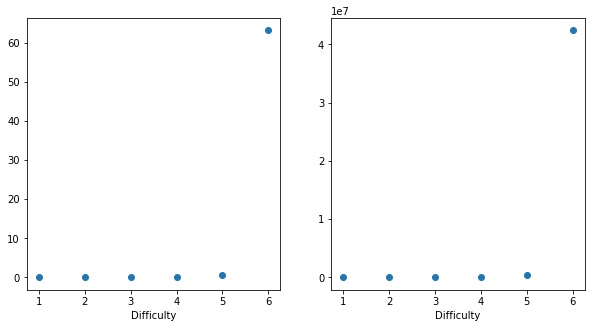

In [6]:
# Plot the results
x_data = [pow_time for pow_time, counter in test_results] # Time taken
y_data = [counter for pow_time, counter in test_results]  # Number of iterations

fig = plt.figure(figsize=(10,5))
sub1 = plt.subplot(121)
sub1.set_xlabel('Difficulty')
sub1.scatter(dif_range, x_data)

sub2 = plt.subplot(122)
sub2.set_xlabel('Difficulty')
sub2.scatter(dif_range, y_data)

### Ask for input

In [7]:
# 'Alice' is a hashed value in this list
usernames = ["cd9fb1e148ccd8442e5aa74904cc73bf6fb54d1d54d333bd596aa9bb4bb4e961", 
             "3bc51062973c458d5a6f2d8d64a023246354ad7e064b1e4e009ec8a0699a3043", 
             "b5fd03dd91df1cfbd2f19c115d24d58bbda01a23fb01924bb78b2cc14f7ff1cb", 
             "2d1e830624b2572adc05351a7cbee2d3aa3f6a52b34fa38a260c9c78f96fcd07"]

#'123' is a hashed password in this list
passwords = ["a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3",
             "a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3",
             "a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3",
             "a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3"]

correct_username = True

while correct_username:
    username = input("Enter Username: ")
    hash_user = hashlib.sha256(bytes(str(username), encoding="UTF-8")).hexdigest()
    index = -1
    if hash_user in usernames:
        correct_username = False
        index = usernames.index(hash_user)
        correct_password = True;
        while correct_password:
            password = input("Enter Password: ")
            hash_pass = hashlib.sha256(bytes(str(password), encoding="UTF-8")).hexdigest()
            if hash_pass in passwords:
                correct_password = False
                print("Welcome ", username)
            else:
                print("Incorrect password try 123")
    else:
        print("Incorrect Username try Alice")

Enter Username: Alice
Enter Password: 123
Welcome  Alice


### Build typical transaction object
A transaction should have the following properties:
1.  The owners public key and private key (Alice's public key, for example.
2.  Another users public key, so that they can send encrypted messages

In [8]:
"""
Similate a basic transaction
1.  Create digital wallet objects for Alice and Bob.
2.  Create private and digital keys for these wallets
3.  Send Bob's public key in 'PEM' format to Alice
4.  Alice then encrypt's a message using Bob's public key
5.  Alice sends encrypted message to Bob
6.  Bob receives message and decrypts message using his private key
"""
# Just a simple idea for blockchain at the momment and putting in some pre-set usernames and balances. 
#Would be good if we could put into json file and read set these initial variables then when receiver finally decrypts the msg he can update other people -i.e. Alices json file
usernames = ["cd9fb1e148ccd8442e5aa74904cc73bf6fb54d1d54d333bd596aa9bb4bb4e961", 
             "3bc51062973c458d5a6f2d8d64a023246354ad7e064b1e4e009ec8a0699a3043", 
             "b5fd03dd91df1cfbd2f19c115d24d58bbda01a23fb01924bb78b2cc14f7ff1cb", 
             "2d1e830624b2572adc05351a7cbee2d3aa3f6a52b34fa38a260c9c78f96fcd07"]
passwords = ["a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3",
             "a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3",
             "a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3",
             "a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3",
             "a665a45920422f9d417e4867efdc4fb8a04a1f3fff1fa07e998e86f7f7a27ae3"]
balances = [50,50,50,50]

#using hash for usernames so you cannot see individuals names -same as in bitcoin
hash_user= 0
hash_receiver = 0
#to find balance/password for send/receiver to easily update them at end
index_sender = -1
index_reciever = 0

amount = 0

incorrect_username = True
while incorrect_username:
    username = input("Enter Username: ")
    hash_user = hashlib.sha256(bytes(str(username), encoding="UTF-8")).hexdigest()
    if hash_user in usernames:
        incorrect_username = False
        index = usernames.index(hash_user)
        incorrect_password = True;
        while incorrect_password:
            password = input("Enter Password: ")
            hash_pass = hashlib.sha256(bytes(str(password), encoding="UTF-8")).hexdigest()
            if hash_pass in passwords:
                incorrect_password = False
                print("Welcome ", username)
            else:
                print("Incorrect password try 123")
    else:
        print("Incorrect Username try Alice, Bob, Jack, or Ryan")
incorrect_receiver = True
while incorrect_receiver:
    receiver = input("Enter Reciever: ")
    hash_receiver = hashlib.sha256(bytes(str(receiver), encoding="UTF-8")).hexdigest()
    if hash_receiver != hash_user and hash_receiver in usernames:
        incorrect_receiver = False
    else:
        print("Invalid receiver")

incorrect_amount = True
while incorrect_amount:
    amount = input("Enter criscoin send amount = ")
    if amount.isdigit() == False:
        print("Integer input required")
    elif balances[index]-int(amount) >= 0 and int(amount) >= 0:
        incorrect_amount = False
    else:
        print("Insufficient credit or invalid entry")
            
# Build wallets for Alice and Bob
senders_wallet = DigitalWallet(name=hash_user)
receivers_wallet = DigitalWallet(name=hash_receiver)
mine = DigitalWallet(name='Miner')

# Receive a public key from Bob
receivers_public_key = receivers_wallet.send_public_keys()
senders_wallet.receive_public_key(receivers_public_key)

# Message is encrypted so only Bob and Alice can decrypt it

encrypted_message = senders_wallet.send_encrypted_message(hash_receiver, b'Secret message for bob')

#Proof of Work encrypted message recieve from Alice
nonce = mine.proof_of_work(encrypted_message)

# Send Message to Bob and Alice who can decrypt message and check nonce quickly
blockchain_update = receivers_wallet.receive_encrypted_message(encrypted_message, nonce)

Enter Username: Alice
Enter Password: 123
Welcome  Alice
Enter Reciever: Bob
Enter criscoin send amount = 25
Time to proof =  0.007158041000366211
b'Secret message for bob'
